<a href="https://colab.research.google.com/github/jesusdme/CacaoModel/blob/main/Modelo_Cacao_Colombia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Modelo de clasificación de Cacao de Colombia utilizando Random Forest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


file_path = 'Cacao_Dataset_Colombia_Final.csv'
data = pd.read_csv(file_path)


data_clean = data.rename(columns={
    'Área Sembrada (ha)': 'Area_Sembrada',
    'Área Cosechada (ha)': 'Area_Cosechada',
    'Producción (t)': 'Produccion',
    'Rendimiento (t/ha)': 'Rendimiento'
})


data_model = data_clean[['Area_Sembrada', 'Area_Cosechada', 'Produccion', 'Rendimiento']]
data_model = data_model.dropna()


X = data_model[['Area_Sembrada', 'Area_Cosechada', 'Produccion']]
y = data_model['Rendimiento']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)


y_rf_pred = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_rf_pred)

print(f'El valor de R^2 del modelo es: {r2_rf:.3f}')


El valor de R^2 del modelo es: 0.907


In [10]:
# Función para realizar predicciones usando el modelo
def predecir_rendimiento(area_sembrada, area_cosechada, produccion, modelo):

    entrada = pd.DataFrame({
        'Area_Sembrada': [area_sembrada],
        'Area_Cosechada': [area_cosechada],
        'Produccion': [produccion]
    })

    prediccion = modelo.predict(entrada)

    return prediccion[0]

area_sembrada = 2200.0
area_cosechada = 2200.0
produccion = 2200.0

resultado = predecir_rendimiento(area_sembrada, area_cosechada, produccion, rf_model)
print(f'Predicción de rendimiento: {resultado:.3f} t/ha')

# Menor a 0.3 bajo
# Entre 0.31 y 0.69 medio
# Mayor a 0.7 alto

Predicción de rendimiento: 0.817 t/ha


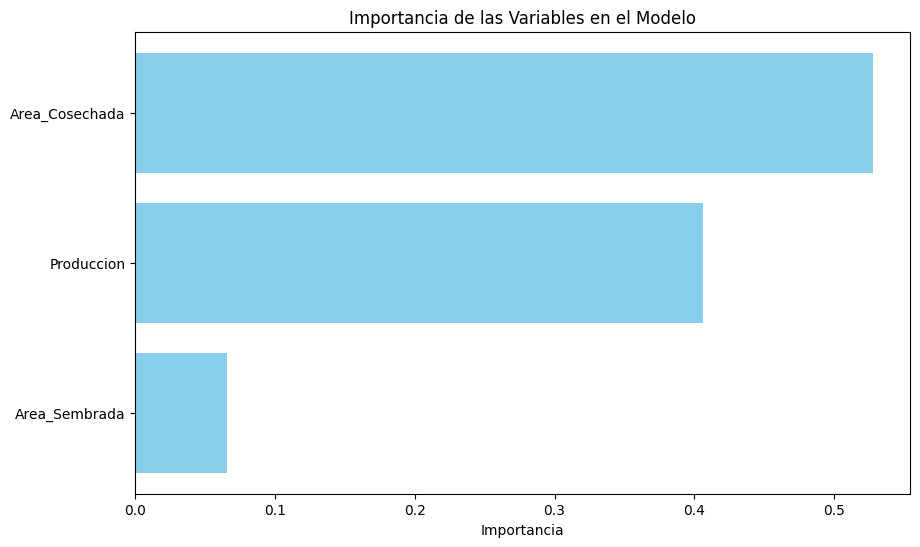

In [11]:
import matplotlib.pyplot as plt


# Obtener la importancia de las características
feature_importances = rf_model.feature_importances_

# Crear un DataFrame para visualizar la importancia
features = X.columns  # Nombres de las características
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Variables en el Modelo')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar de mayor a menor
plt.show()


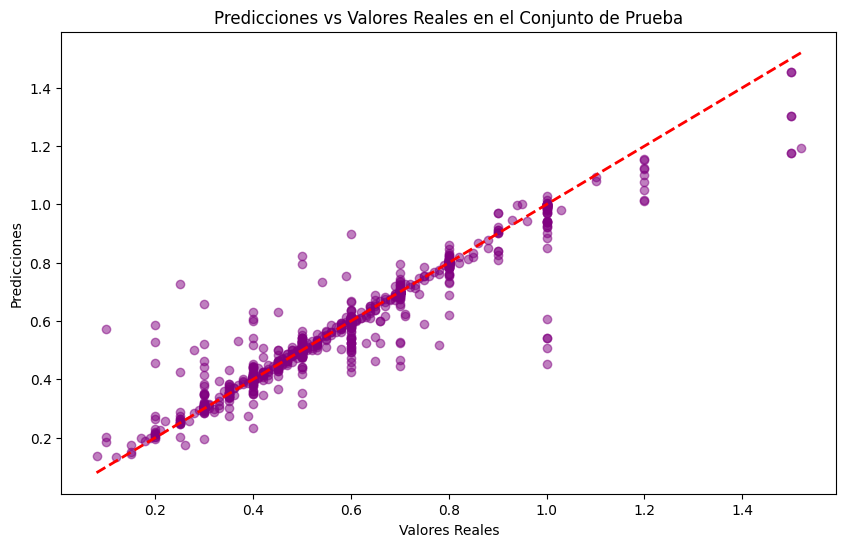

In [12]:
# Generar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Crear un gráfico de dispersión para comparar predicciones y valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales en el Conjunto de Prueba')
plt.show()


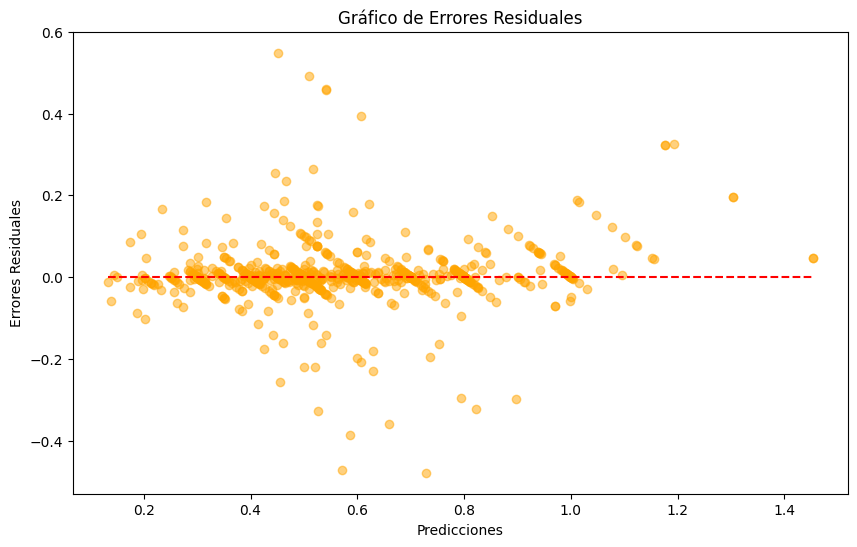

In [13]:
# Calcular los errores residuales
residuals = y_test - y_pred

# Graficar los errores residuales
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='orange')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), linestyles='dashed', colors='red')
plt.xlabel('Predicciones')
plt.ylabel('Errores Residuales')
plt.title('Gráfico de Errores Residuales')
plt.show()


In [19]:
pip install pandas scikit-learn skl2onnx onnx


In [20]:
!pip install onnxruntime



In [23]:
# Importar librerías adicionales para la conversión
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import onnx

# Código existente
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Cargar y limpiar datos
file_path = 'Cacao_Dataset_Colombia_Final.csv'
data = pd.read_csv(file_path)
data_clean = data.rename(columns={
    'Área Sembrada (ha)': 'Area_Sembrada',
    'Área Cosechada (ha)': 'Area_Cosechada',
    'Producción (t)': 'Produccion',
    'Rendimiento (t/ha)': 'Rendimiento'
})
data_model = data_clean[['Area_Sembrada', 'Area_Cosechada', 'Produccion', 'Rendimiento']]
data_model = data_model.dropna()

# Preparar los datos
X = data_model[['Area_Sembrada', 'Area_Cosechada', 'Produccion']]
y = data_model['Rendimiento']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones y evaluar
y_rf_pred = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_rf_pred)
print(f'El valor de R^2 del modelo es: {r2_rf:.3f}')

# Convertir el modelo a ONNX
initial_type = [('float_input', FloatTensorType([None, 3]))]  # Define la entrada con el mismo número de características que en X (3 en este caso)
onnx_model = convert_sklearn(rf_model, initial_types=initial_type)

# Guardar el modelo ONNX
onnx_file_path = "rf_model_cacao.onnx"
with open(onnx_file_path, "wb") as f:
    f.write(onnx_model.SerializeToString())

print(f"Modelo convertido y guardado en {onnx_file_path}")


El valor de R^2 del modelo es: 0.907
Modelo convertido y guardado en rf_model_cacao.onnx
